# Toybox High Aspect Ratio equilibirum



In [1]:
import numpy as np
from pyoculus.fields import AnalyticCylindricalBfield
from pyoculus.maps import CylindricalBfieldSection
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
bfield = AnalyticCylindricalBfield(6, 0, 1, 0.5)

In [4]:
section = CylindricalBfieldSection(bfield, R0=6, Z0=0, rtol=1e-13)

### Plotting the unperturbed equilibrium 

In [5]:
pplot = PoincarePlot.with_horizontal(section, 1, 10)

In [6]:
pplot.compute(compute_iota=True)

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': 
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': UNIMPLEMENTED: LoadPjrtPlugin is not implemented on windows yet.


array([[[ 6.00000001e+00,  0.00000000e+00],
        [ 6.00000001e+00,  1.82877831e-12],
        [ 6.00000001e+00,  3.64516943e-12],
        ...,
        [ 6.00000001e+00,  3.62245814e-10],
        [ 6.00000001e+00,  3.64059854e-10],
        [ 6.00000001e+00,  3.65890518e-10]],

       [[ 6.11111112e+00,  0.00000000e+00],
        [ 6.11102547e+00, -4.36193937e-03],
        [ 6.11076865e+00, -8.71703186e-03],
        ...,
        [ 6.02245989e+00, -1.08817435e-01],
        [ 6.01823459e+00, -1.09604657e-01],
        [ 6.01398500e+00, -1.10227495e-01]],

       [[ 6.22222223e+00,  0.00000000e+00],
        [ 6.21948580e+00, -3.47664339e-02],
        [ 6.21135333e+00, -6.86475727e-02],
        ...,
        [ 6.02122709e+00,  2.21206081e-01],
        [ 6.05457642e+00,  2.15416187e-01],
        [ 6.08682936e+00,  2.04556550e-01]],

       ...,

       [[ 6.77777778e+00,  0.00000000e+00],
        [ 5.98564203e+00, -7.77645243e-01],
        [ 5.23714825e+00, -1.51642639e-01],
        ...,
     

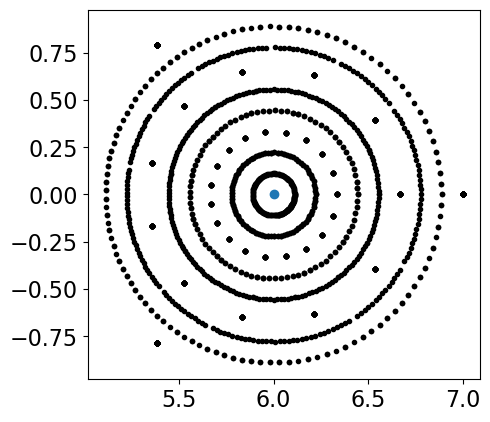

In [7]:
fig, ax = pplot.plot()
ax.scatter(section.R0, section.Z0)

In [8]:
pplot.compute_iota()

(array([[6.00000001, 0.        ],
        [6.11111112, 0.        ],
        [6.22222223, 0.        ],
        [6.33333334, 0.        ],
        [6.44444445, 0.        ],
        [6.55555556, 0.        ],
        [6.66666667, 0.        ],
        [6.77777778, 0.        ],
        [6.88888889, 0.        ],
        [7.        , 0.        ]]),
 array([1.01006728, 1.00386715, 0.98572729, 0.95690323, 0.91927474,
        0.875031  , 0.8264172 , 0.7755006 , 0.72403017, 0.67337819]))

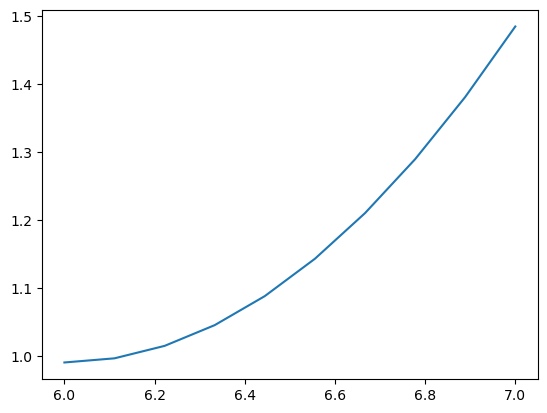

In [9]:
import matplotlib.pyplot as plt
plt.plot(np.linalg.norm(pplot.xs, axis=1), 1 / pplot.iota)

## Adding the maxwellian perturbation

In [10]:
maxwellboltzmann = {"R": section.R0, "Z": section.Z0,
                    "m": 3, "n": -2, "d": 1.75/np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 1e-1}
bfield.add_perturbation(maxwellboltzmann)

section.clear_cache()
section.find_axis()

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [6. 0.]
INFO:pyoculus.solvers.fixed_point:Newton 0 - delta_x : [0. 0.]
INFO:pyoculus.solvers.fixed_point:Found fixed point at [6. 0.]. Computing additional data...


In [11]:
fp_x1 = FixedPoint(section)
guess = [5.05, 0]

fp_x1.find(3, guess)
# fp01.find_with_iota(0, 1, guess)

fp_x1._found_by_iota = True
fp_x1._m = 3

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [5.05 0.  ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - delta_x : [ 0.26576426 -0.44516152]
INFO:pyoculus.solvers.fixed_point:Newton 0 - step : [-0.07551086 -0.12133307]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x : [ 4.97448914 -0.12133307]
INFO:pyoculus.solvers.fixed_point:Newton 1 - delta_x : [-0.00742598  0.29070084]
INFO:pyoculus.solvers.fixed_point:Newton 1 - step : [0.03294384 0.09750858]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x : [ 5.00743299 -0.02382449]
INFO:pyoculus.solvers.fixed_point:Newton 2 - delta_x : [-0.01320026  0.09889978]
INFO:pyoculus.solvers.fixed_point:Newton 2 - step : [0.01069784 0.01841836]
INFO:pyoculus.solvers.fixed_point:Newton 3 - x : [ 5.01813083 -0.00540613]
INFO:pyoculus.solvers.fixed_point:Newton 3 - delta_x : [0.00193401 0.00457579]
INFO:pyoculus.solvers.fixed_point:Newton 3 - step : [0.0019237  0.00543216]
INFO:pyoculus.solvers.fixed_point:Newton 4 - x : [5.02005453e+00 2.60268720e-05]
INFO:

(<Figure size 640x480 with 1 Axes>, <Axes: >)

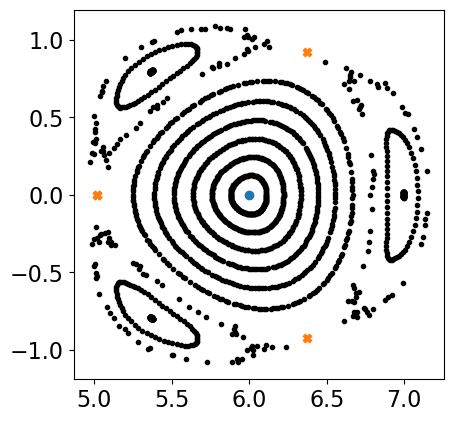

In [12]:
pplot = PoincarePlot.with_horizontal(section, 1, 10)
pplot.compute(compute_iota=True)
fig, ax = pplot.plot()
ax.scatter(section.R0, section.Z0)
fp_x1.plot(ax=ax)

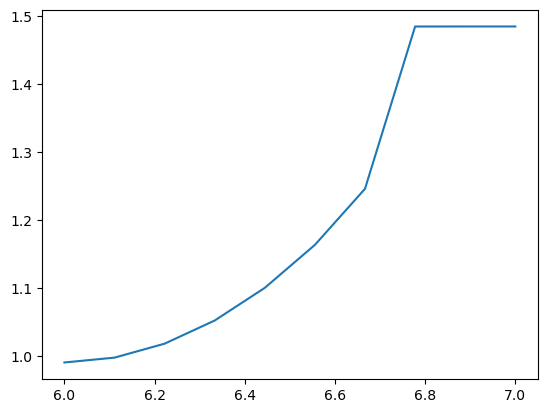

In [13]:
pplot.compute_iota()
import matplotlib.pyplot as plt
plt.plot(np.linalg.norm(pplot.xs, axis=1), 1 / pplot.iota)

In [14]:
fp_x2 = FixedPoint(section)

fp_x2.find(3, fp_x1.coords[1])
# fp01.find_with_iota(0, 1, guess)

fp_x2._found_by_iota = True
fp_x2._m = 3

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [6.37050595 0.92340241]
INFO:pyoculus.solvers.fixed_point:Newton 0 - delta_x : [-5.42819123e-11  4.23372448e-12]
INFO:pyoculus.solvers.fixed_point:Found fixed point at [6.37050595 0.92340241]. Computing additional data...


In [23]:
manif = Manifold(section, fp_x1, fp_x2)
manif.choose([[-1, -1],[-1, 1]])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

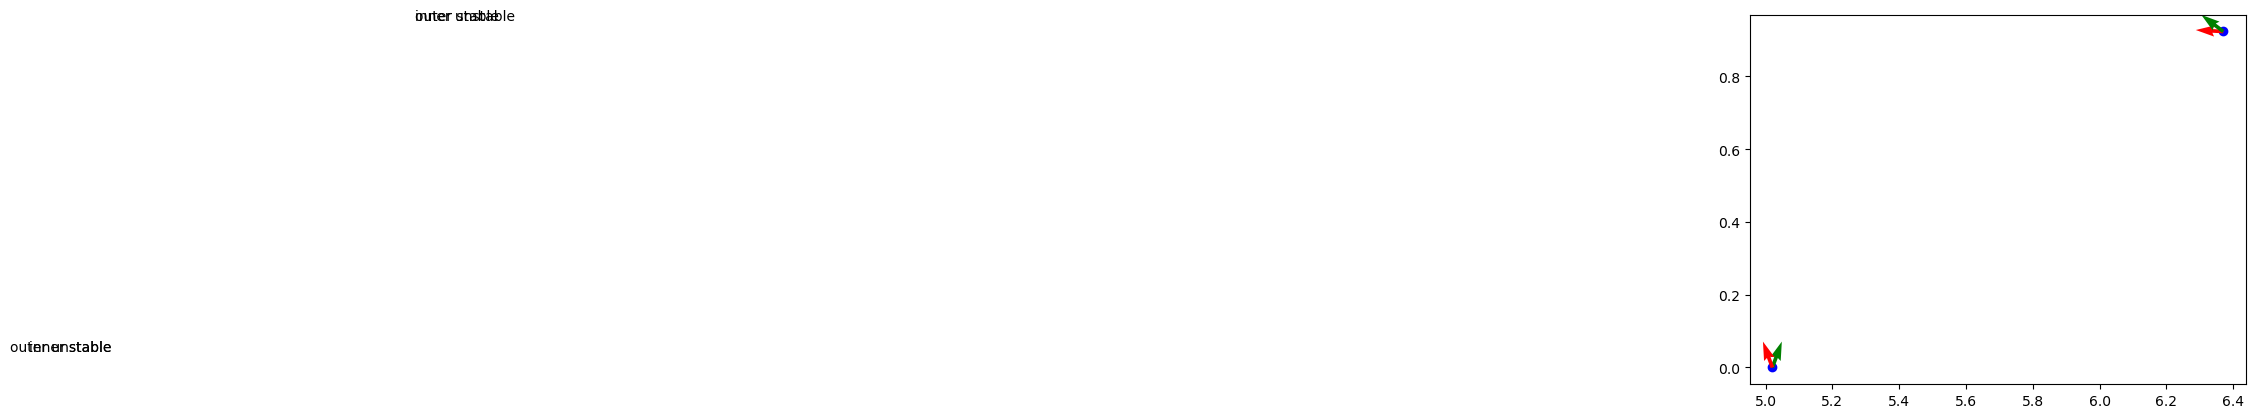

In [16]:
manif.show_directions()

In [17]:
manif.compute(directions="both", nintersect=6, neps=50)
manif.plot(ax=ax)

INFO:pyoculus.solvers.manifold:Computing manifold for directions [inner/outer/both]: both
INFO:pyoculus.solvers.manifold:Search for minimum of the linear error succeeded, epsilon = 1.73606e-07
INFO:pyoculus.solvers.manifold:Search for minimum of the linear error succeeded, epsilon = 1.23030e-07
INFO:pyoculus.solvers.manifold:Computing unstable manifold...
INFO:pyoculus.solvers.manifold:Computing stable manifold...
INFO:pyoculus.solvers.manifold:Computing unstable manifold...
INFO:pyoculus.solvers.manifold:Computing stable manifold...


(<Figure size 640x480 with 1 Axes>, <Axes: >)

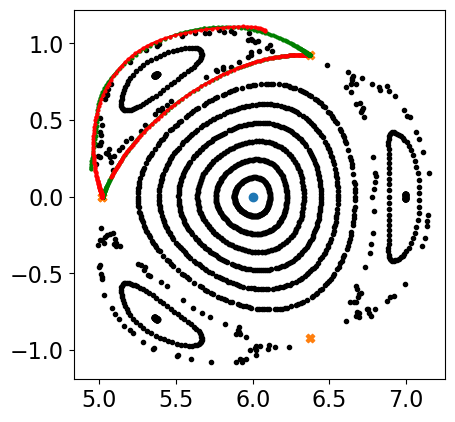

In [18]:
fig

### Inner turnstile

In [19]:
# Finding the clinics
i, s_shift = 6, 2
n_s, n_u = i+s_shift, i-s_shift
manif.onworking = manif.inner
manif.find_clinic_single(n_s=n_s, n_u=n_u)
manif.find_clinics(n_points=4)
manif.plot_clinics(ax=ax)

INFO:pyoculus.solvers.manifold:Search for minimum of the linear error succeeded, epsilon = 1.73606e-07
INFO:pyoculus.solvers.manifold:Search for minimum of the linear error succeeded, epsilon = 8.14334e-08
INFO:pyoculus.solvers.manifold:Root finding status : The solution converged.
INFO:pyoculus.solvers.manifold:Eps_s : 8.906e-07, Eps_u : 5.220e-08 gives a difference in endpoint [R,Z] : [7.14817538e-10 1.53364987e-10]
INFO:pyoculus.solvers.manifold:Initial guess: [5.717341139693263e-06, 9.911723885128942e-08]
INFO:pyoculus.solvers.manifold:Root finding status : The solution converged.
INFO:pyoculus.solvers.manifold:Eps_s : 6.095e-06, Eps_u : 9.912e-08 gives a difference in endpoint [R,Z] : [ 5.59046143e-11 -1.62652114e-11]
INFO:pyoculus.solvers.manifold:Initial guess: [3.0112408015826754e-06, 1.881905515667768e-07]
INFO:pyoculus.solvers.manifold:Root finding status : The solution converged.
INFO:pyoculus.solvers.manifold:Eps_s : 3.210e-06, Eps_u : 1.882e-07 gives a difference in endpoi

(<Figure size 640x480 with 1 Axes>, <Axes: >)

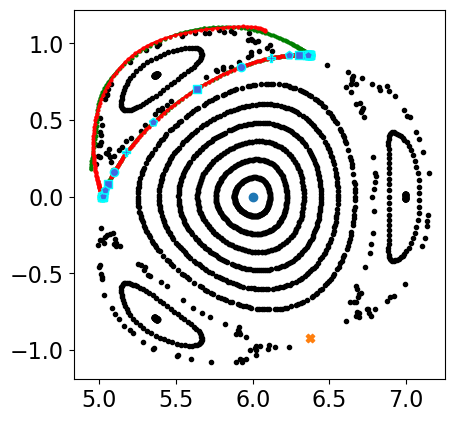

In [20]:
fig

In [21]:
manif.turnstile_area()

INFO:pyoculus.solvers.manifold:Forward integration goes beyond stable saddle point.
INFO:pyoculus.solvers.manifold:Potential integration completed for homo/hetero-clinic point of order : 5.220e-08
INFO:pyoculus.solvers.manifold:Forward integration goes beyond stable saddle point.
INFO:pyoculus.solvers.manifold:Potential integration completed for homo/hetero-clinic point of order : 9.912e-08
INFO:pyoculus.solvers.manifold:Forward integration goes beyond stable saddle point.
INFO:pyoculus.solvers.manifold:Potential integration completed for homo/hetero-clinic point of order : 1.882e-07
INFO:pyoculus.solvers.manifold:Forward integration goes beyond stable saddle point.
INFO:pyoculus.solvers.manifold:Potential integration completed for homo/hetero-clinic point of order : 3.573e-07


array([ 0.010333  , -0.00054781, -0.00204777, -0.0078407 ])

### Outer turnstile

In [24]:
# Finding the clinics
s_shift = 1
n_s, n_u = 6+s_shift, 6-s_shift
manif.onworking = manif.outer
manif.find_clinic_single(n_s=n_s, n_u=n_u)
manif.find_clinics(n_points=4)
manif.plot_clinics(ax=ax)

INFO:pyoculus.solvers.manifold:Search for minimum of the linear error succeeded, epsilon = 1.28224e-07
INFO:pyoculus.solvers.manifold:Search for minimum of the linear error succeeded, epsilon = 1.47522e-07
INFO:pyoculus.solvers.manifold:Root finding status : The solution converged.
INFO:pyoculus.solvers.manifold:Eps_s : 9.069e-07, Eps_u : 1.324e-07 gives a difference in endpoint [R,Z] : [-7.86575249e-10 -5.07450293e-09]
INFO:pyoculus.solvers.manifold:Initial guess: [6.420069452610191e-06, 2.514010963795444e-07]
C:\Users\Ludovic\kDrive\etudes\EPFL\masterthesis\imports\pyoculus\pyoculus\maps\cylindrical_bfield_section.py:292: RuntimeWarning: divide by zero encountered in scalar divide
  dRdphi = Bfield[0] / Bfield[1]
C:\Users\Ludovic\kDrive\etudes\EPFL\masterthesis\imports\pyoculus\pyoculus\maps\cylindrical_bfield_section.py:293: RuntimeWarning: divide by zero encountered in scalar divide
  dZdphi = Bfield[2] / Bfield[1]
c:\Users\Ludovic\miniforge3\envs\simsopt\lib\site-packages\scipy\in

Exception: Integration failed

In [ ]:
fig

In [ ]:
manif.turnstile_area()